https://towardsdatascience.com/topic-modeling-of-2019-hr-tech-conference-twitter-d16cf75895b6

In [1]:
import pandas as pd
#df = pd.read_csv('C:/Users/jeanl/Desktop/trial.csv',index_col=False)
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import pandas as pd
import re, pickle, os
import datetime 
import nltk
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet 
from collections import Counter 
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.corpora import MmCorpus
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


https://pypi.org/project/pickle5/
    
https://www.codegrepper.com/code-examples/python/pickling+open+pickle+protocol+5+

solve the error unsuported protocol 5 

In [2]:

#import pickle5 as pickle
#data = pickle.load(open("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/processed_data/wfpdata", "rb"))
#data

In [3]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [4]:
import PyPDF2 as p

text = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/WFP_result.pdf")



In [6]:
type(text)

str

In [7]:
def get_wordnet_pos(word):
    """
    Map POS tag to first character lemmatize() accepts
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html

In [8]:
#text = data['words']


In [9]:
#text

In [10]:
#text1 = text.to_string()

In [11]:
#type(text1)

In [12]:
text_clean = text.lower()
# Remove non-alphabet
text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean).split()

In [13]:
# Remove short words (length < 3)
#text_clean = [w for w in text_clean if len(w)>2]
# Lemmatize text with the appropriate POS tag
lemmatizer = WordNetLemmatizer()
text_clean = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text_clean]

In [14]:
# Filter out stop words in English 
stops = set(stopwords.words('english')).union('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY')
text_clean = [w for w in text_clean if w not in stops]

In [15]:
text_clean

['food',
 'security',
 'nutrition',
 'world',
 'state',
 'safeguard',
 'economic',
 'slowdown',
 'downturnsdemocratic',
 'republic',
 'congo',
 'young',
 'woman',
 'sell',
 'fruit',
 'street',
 'market',
 'cover',
 'photograph',
 'shutterstock',
 'valeriya',
 'anufriyeva',
 'flagship',
 'publication',
 'part',
 'state',
 'world',
 'series',
 'food',
 'agriculture',
 'organization',
 'united',
 'nation',
 'require',
 'citation',
 'fao',
 'ifad',
 'unicef',
 'wfp',
 'state',
 'food',
 'security',
 'nutrition',
 'world',
 'safeguard',
 'economic',
 'slowdown',
 'downturn',
 'rome',
 'fao',
 'licence',
 'cc',
 'nc',
 'sa',
 'igo',
 'designation',
 'employ',
 'presentation',
 'material',
 'information',
 'product',
 'imply',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'food',
 'agriculture',
 'organization',
 'united',
 'nation',
 'fao',
 'international',
 'fund',
 'agricultural',
 'development',
 'ifad',
 'united',
 'nation',
 'child',
 'fund',
 'unicef',
 'world',
 'food',
 'progr

# Word Count and Word Cloud

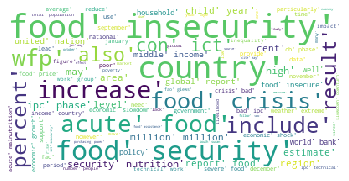

In [16]:
%matplotlib inline
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(text_clean))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Feature Extraction

### Bag of Words (Bigrams)
### Count bigrams
A bigram is a sequence of two words e.g. machine learning, talent acquisition. Often, a bag-of-bigrams is more powerful and produce more meaningful insights than a bag-of-words (single word, or unigram).

### Build a dictionary
We build the dictionary (or vocabulary) of the text in which all the unique bigrams of the text are given IDs and their frequency counts are also captured. We use Gensim library for building the dictionary.
We exclude all the tokens from the dictionary which have occurred in less than 10 text, so that we only deal with most representative words. Also bigrams that have occurred in more than 50% of the text are also removed e.g. near future, next year

In [17]:
type(text_clean)

list

In [18]:
type(text_clean)

list

In [19]:
# Let's convert sourceList to a list of strings and then join its elements.
stringList = ' '.join([str(item) for item in text_clean ])

print(stringList)

food security nutrition world state safeguard economic slowdown downturnsdemocratic republic congo young woman sell fruit street market cover photograph shutterstock valeriya anufriyeva flagship publication part state world series food agriculture organization united nation require citation fao ifad unicef wfp state food security nutrition world safeguard economic slowdown downturn rome fao licence cc nc sa igo designation employ presentation material information product imply expression opinion whatsoever part food agriculture organization united nation fao international fund agricultural development ifad united nation child fund unicef world food programme wfp world health organization concern legal development status country territory city area authority concern delimitation frontier boundary mention specific company product manufacturer whether patent imply endorse recommend fao ifad unicef wfp preference others similar nature mention designation employ presentation material map im

In [27]:
#Tokenize the sentence into words
tokens = [word for word in stringList.split()]
#Create dictionary
dictionary = corpora.Dictionary([tokens])
print(dictionary)

Dictionary(9553 unique tokens: ['aa', 'aah', 'ab', 'aba', 'ababa']...)


In [28]:
#dictionary.filter_extremes(no_below=10, no_above=0.5)

In [29]:
#from gensim import corpora
#text_dict = corpora.Dictionary(stringList)
#text_dict.filter_extremes(no_below=10, no_above=0.5)

In [30]:
print(dictionary)

Dictionary(9553 unique tokens: ['aa', 'aah', 'ab', 'aba', 'ababa']...)


In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in [tokens]]


In [32]:
print(bow_corpus)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 9), (5, 15), (6, 3), (7, 2), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 5), (16, 45), (17, 2), (18, 38), (19, 1), (20, 4), (21, 3), (22, 18), (23, 6), (24, 2), (25, 10), (26, 1), (27, 1), (28, 17), (29, 7), (30, 1), (31, 1), (32, 11), (33, 2), (34, 1), (35, 37), (36, 21), (37, 2), (38, 1), (39, 2), (40, 1), (41, 58), (42, 86), (43, 3), (44, 1), (45, 1), (46, 1), (47, 3), (48, 665), (49, 4), (50, 1), (51, 11), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 2), (59, 4), (60, 1), (61, 1), (62, 56), (63, 7), (64, 4), (65, 1), (66, 1), (67, 76), (68, 15), (69, 3), (70, 3), (71, 2), (72, 1), (73, 4), (74, 5), (75, 1), (76, 1), (77, 2), (78, 141), (79, 25), (80, 2), (81, 1), (82, 3), (83, 3), (84, 1), (85, 1), (86, 2), (87, 18), (88, 1), (89, 1), (90, 2), (91, 4), (92, 1), (93, 1), (94, 2), (95, 7), (96, 2), (97, 1), (98, 1), (99, 150), (100, 2), (101, 1), (102, 15), (103, 206), (104, 1), (105, 1), (106, 28), (107, 2), (

In [33]:
from gensim import models
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

In [34]:
print(tfidf_corpus)

In [43]:
from gensim import models
NUM_TOPICS = 30
NUM_PASSES = 50 
ALPHA = 0.001
ETA = 'auto'
# Train LDA model
lda_model = models.ldamodel.LdaModel(corpus=tfidf_corpus, 
                                         num_topics=NUM_TOPICS, 
                                         id2word=dictionary, 
                                         passes=NUM_PASSES, 
                                         alpha=ALPHA, 
                                         eta=ETA,
                                         random_state=49)

In [47]:
import pyLDAvis.gensim
lda_data =  pyLDAvis.gensim.prepare(lda_model,tfidf_corpus,dictionary, mds='mmds')
pyLDAvis.display(lda_data)


of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]
